## NLP Sentiment classification

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pckl
sns.set_theme()
sns.set_style('whitegrid')
sns.set(font_scale=1.25)
sns.set()

#### Extraction et recodage des données

In [27]:
data = pckl.load(open('data_query.p','rb'))

In [48]:
data = data.rename(columns={'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target' : 'q1', 'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_confidence': 'q1_confidence', 'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet' : 'q2', 'q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet_confidence': 'q2_confidence'})

#### Exploration des données

In [49]:
print("Shape:  {0}".format(data.shape))

Shape:  (1159, 17)


In [50]:
data.columns

Index(['unit_id', 'golden', 'unit_state', 'trusted_judgments',
       'last_judgment_at', 'q1', 'q1_confidence', 'q2', 'q2_confidence',
       'orig_golden', 'internal_id',
       'orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target',
       'q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold',
       'orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet',
       'target', 'tweet', 'tweet_id'],
      dtype='object')

In [51]:
data.head()

,unit_id,golden,unit_state,trusted_judgments,last_judgment_at,q1,q1_confidence,q2,q2_confidence,orig_golden,internal_id,orig_q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target,q1_from_reading_the_tweet_which_of_the_options_below_is_most_likely_to_be_true_about_the_stance_or_outlook_of_the_tweeter_towards_the_target_gold,orig_q2_which_of_the_options_below_is_true_about_the_opinion_in_the_tweet,target,tweet,tweet_id
0,713632888,True,golden,30,None,AGAINST: We can infer from the tweet that the ...,0.6581,2. The tweet does NOT expresses opinion about ...,0.4976,True,189,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,Thank you for another day of life Lord. #Chris...,id588718177095266305
1,713632889,False,golden,2,None,NONE OF THE ABOVE: There is no clue in the twe...,1.0000,2. The tweet does NOT expresses opinion about ...,0.5294,True,190,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@rosaryrevival Lovely to use Glorious Mysterie...,id592798858725425152
2,713632890,True,golden,26,None,AGAINST: We can infer from the tweet that the ...,0.8859,1. The tweet explicitly expresses opinion abo...,0.8820,True,207,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@Niall250 good thing is that #DUP have consist...,id593472619208380419
3,713632891,False,golden,3,None,AGAINST: We can infer from the tweet that the ...,0.6323,1. The tweet explicitly expresses opinion abo...,0.6323,True,211,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,"So, you tell me... is murder okay if the victi...",id592699132399194112
4,713632892,True,golden,31,None,AGAINST: We can infer from the tweet that the ...,0.8920,1. The tweet explicitly expresses opinion abo...,0.8939,True,213,None,AGAINST: We can infer from the tweet that the ...,None,Legalization of Abortion,@HillaryClinton Don't you mean to say (all chi...,id588527665365188608


In [56]:
data.describe()

,unit_id,trusted_judgments,q1_confidence,q2_confidence,internal_id
count,1.159000e+03,1159.00000,1159.000000,1159.000000,1159.000000
mean,7.136335e+08,8.96635,0.780270,0.721863,1107.838654
std,3.354871e+02,4.79184,0.195433,0.195343,1797.624804
min,7.136329e+08,2.00000,0.257500,0.373200,1.000000
25%,7.136332e+08,8.00000,0.622500,0.517150,240.000000
50%,7.136335e+08,8.00000,0.814300,0.740700,336.000000
75%,7.136338e+08,8.00000,1.000000,0.882750,439.000000
max,7.136340e+08,38.00000,1.000000,1.000000,5194.000000


#### q1

In [62]:
#q1 from reading the tweet which of the options below is most likely to be true about the stance or outlook of the tweeter towards the target
print(data['q1'].unique())

['AGAINST: We can infer from the tweet that the tweeter is against the target (e.g., directly or indirectly by opposing or criticizing someone/something, by supporting someone/something opposed to the target, or by echoing the stance of somebody else).'
 'NONE OF THE ABOVE: There is no clue in the tweet to reveal the stance of the tweeter towards the target (support/against/neutral).'
 'FOR: We can infer from the tweet that the tweeter supports the target (e.g., directly or indirectly by supporting someone/something, by opposing or criticizing someone/something opposed to the target, or by echoing the stance of somebody else).'
 'NEUTRAL: We can infer from the tweet that the tweeter has a neutral stance towards the target. (The tweet being neither favorable nor against the target is not sufficient reason for choosing this option. One reason for choosing this option is that the tweeter supports the target entity to some extent, but is also against it to some extent.)']


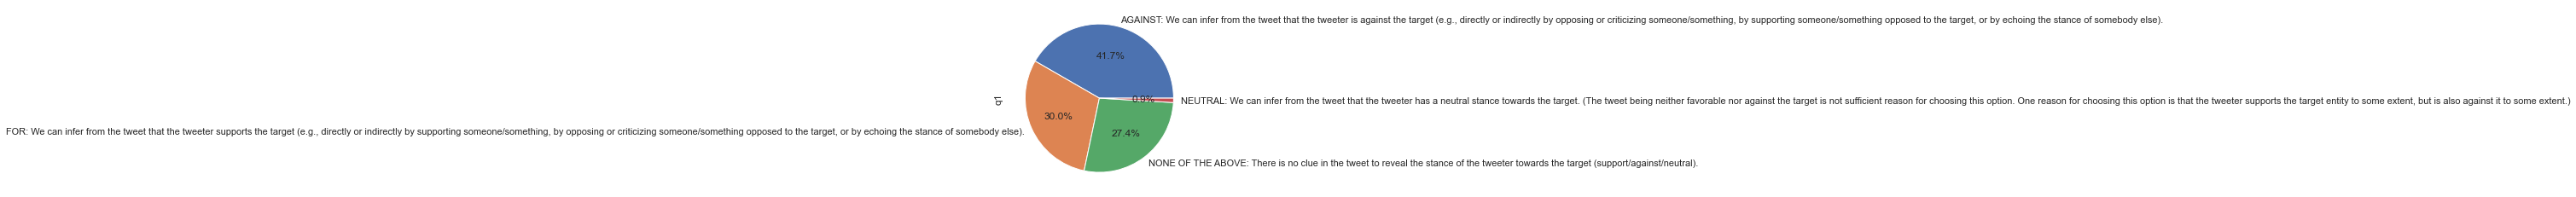

In [68]:
pd.Series(q1_resume).value_counts().plot.pie(autopct="%.1f%%")
plt.show()

#### Sujets des tweets 

In [33]:
#Target
print(data['target'].unique())

['Legalization of Abortion' 'Hillary Clinton' 'Feminist Movement'
 'Atheism']


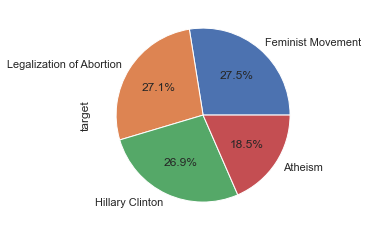

In [55]:
pd.Series(data['target']).value_counts().plot.pie(autopct="%.1f%%")
plt.show()

#### Tweet

In [42]:
len(data['tweet'])

1159

In [60]:
tweet = data['tweet'].astype(str)

In [61]:
#Nuage de mot
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud().generate(tweet)

TypeError: expected string or bytes-like object

#### Valeurs manquantes

In [52]:
data.isna().sum()

unit_id                                                                                                                                                 0
golden                                                                                                                                                  0
unit_state                                                                                                                                              0
trusted_judgments                                                                                                                                       0
last_judgment_at                                                                                                                                       69
q1                                                                                                                                                      0
q1_confidence                                                               